In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.feature_extraction import EfficientFCParameters

In [2]:
df=pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD002.txt', delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [3]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
df.columns=columns
df['max_time']=df.groupby('unit')['time'].transform('max')
df['remaining_time']=df['max_time']-df['time']
df['label']=df['remaining_time'].clip(upper=130)
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,9.3461,0.02,334,2223,100.00,14.73,8.8071,149,148,130
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,9.3774,0.02,330,2212,100.00,10.41,6.2665,149,147,130
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,10.8941,0.02,309,1915,84.93,14.08,8.6723,149,146,130
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,9.3528,0.02,329,2212,100.00,10.59,6.4701,149,145,130
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,10.8963,0.02,309,1915,84.93,14.13,8.5286,149,144,130


In [4]:
window_size = 60

rolled_df = roll_time_series(
    df,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_df

Rolling: 100%|██████████| 54/54 [00:10<00:00,  5.13it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label,id
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,0.02,334,2223,100.00,14.73,8.8071,149,148,130,"(1, 60)"
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,0.02,330,2212,100.00,10.41,6.2665,149,147,130,"(1, 60)"
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,0.02,309,1915,84.93,14.08,8.6723,149,146,130,"(1, 60)"
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,0.02,329,2212,100.00,10.59,6.4701,149,145,130,"(1, 60)"
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,0.02,309,1915,84.93,14.13,8.5286,149,144,130,"(1, 60)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291875,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,0.03,369,2324,100.00,24.36,14.5189,316,4,4,"(260, 316)"
2291876,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,0.03,374,2319,100.00,28.10,16.9454,316,3,3,"(260, 316)"
2291877,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,0.02,310,1915,84.93,14.19,8.5503,316,2,2,"(260, 316)"
2291878,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,0.02,311,1915,84.93,14.05,8.3729,316,1,1,"(260, 316)"


In [5]:
selected_cols=['id',
               'sr1', 'sr2', 'sr3', 'sr4', 'sr5',
               'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
                'sr11', 'sr12', 'sr13', 'sr14', 'sr15',
                'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']

In [6]:
selected_df=rolled_df[selected_cols]
selected_df

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 60)",449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,"(1, 60)",445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,"(1, 60)",462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,"(1, 60)",445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,"(1, 60)",462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291875,"(260, 316)",491.19,608.79,1495.60,1269.51,9.35,13.66,334.00,2324.92,8852.27,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
2291876,"(260, 316)",489.05,605.81,1514.32,1324.12,10.52,15.50,392.46,2319.17,8915.86,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
2291877,"(260, 316)",462.54,537.48,1276.24,1057.92,7.05,9.04,175.11,1917.37,8114.33,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
2291878,"(260, 316)",462.54,537.84,1272.95,1066.30,7.05,9.04,174.81,1917.36,8112.63,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [7]:
unique_ids = selected_df['id'].unique()

# Split the unique ids into two halves
midpoint = len(unique_ids) // 2
first_half_ids = unique_ids[:midpoint]  # First half of unique ids
second_half_ids = unique_ids[midpoint:]  # Second half of unique ids

# Filter the DataFrame for each half based on the unique ids
first_half_df = selected_df[selected_df['id'].isin(first_half_ids)]
second_half_df = selected_df[selected_df['id'].isin(second_half_ids)]

print(len(first_half_df)+ len(second_half_df))

2305140


In [8]:
first_half_df

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 60)",449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,"(1, 60)",445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,"(1, 60)",462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,"(1, 60)",445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,"(1, 60)",462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319855,"(131, 80)",518.67,642.40,1586.17,1394.88,14.62,21.61,553.66,2388.04,9052.17,...,521.53,2388.08,8139.32,8.4149,0.03,392,2388,100.00,39.09,23.5024
319856,"(131, 80)",518.67,642.23,1587.15,1405.11,14.62,21.61,554.17,2388.04,9054.00,...,521.60,2388.06,8130.16,8.4065,0.03,391,2388,100.00,39.00,23.4103
319857,"(131, 80)",445.00,549.50,1355.90,1126.44,3.91,5.71,138.59,2211.83,8313.24,...,130.39,2387.95,8079.55,9.3377,0.02,329,2212,100.00,10.63,6.5011
319858,"(131, 80)",445.00,549.55,1347.00,1123.60,3.91,5.71,139.14,2211.90,8314.96,...,131.19,2387.97,8082.22,9.3577,0.02,331,2212,100.00,10.69,6.3219


In [9]:
second_half_df

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
335400,"(131, 81)",445.00,549.34,1349.90,1117.43,3.91,5.72,139.17,2211.81,8319.70,...,130.70,2387.96,8085.53,9.3415,0.02,331,2212,100.00,10.70,6.4248
335401,"(131, 81)",489.05,604.90,1496.89,1301.87,10.52,15.49,395.08,2318.89,8768.63,...,371.94,2388.04,8118.74,8.6318,0.03,369,2319,100.00,28.64,17.2388
335402,"(131, 81)",491.19,607.64,1486.40,1243.78,9.35,13.65,334.78,2323.90,8728.91,...,315.63,2388.05,8058.19,9.1741,0.02,365,2324,100.00,24.73,14.7818
335403,"(131, 81)",449.44,555.20,1363.89,1125.70,5.48,8.00,194.34,2222.87,8342.42,...,183.02,2387.95,8067.96,9.2625,0.02,333,2223,100.00,14.83,8.9390
335404,"(131, 81)",449.44,555.55,1363.56,1120.83,5.48,8.00,194.25,2222.89,8344.43,...,183.48,2387.93,8056.65,9.2687,0.02,333,2223,100.00,14.81,9.0483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291875,"(260, 316)",491.19,608.79,1495.60,1269.51,9.35,13.66,334.00,2324.92,8852.27,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
2291876,"(260, 316)",489.05,605.81,1514.32,1324.12,10.52,15.50,392.46,2319.17,8915.86,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
2291877,"(260, 316)",462.54,537.48,1276.24,1057.92,7.05,9.04,175.11,1917.37,8114.33,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
2291878,"(260, 316)",462.54,537.84,1272.95,1066.30,7.05,9.04,174.81,1917.36,8112.63,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [10]:
extraction_settings = EfficientFCParameters()
X1=extract_features(
    first_half_df,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
X1

Feature Extraction: 100%|██████████| 60/60 [23:00<00:00, 23.01s/it]  


sr5__variance_larger_than_standard_deviation  sr5__has_duplicate_max  \
1   60                                           1.0                     1.0   
    61                                           1.0                     1.0   
    62                                           1.0                     1.0   
    63                                           1.0                     1.0   
    64                                           1.0                     1.0   
...                                              ...                     ...   
131 76                                           1.0                     1.0   
    77                                           1.0                     1.0   
    78                                           1.0                     1.0   
    79                                           1.0                     1.0   
    80                                           1.0                     1.0   

        sr5__has_duplicate_min  sr5__has_duplicate  sr5__sum_values  \
1   60                     1.0                 1.0           456.60   
    61                     1.0                 1.0           460.47   
    62                     1.0                 1.0           471.18   
    63                     1.0                 1.0           468.04   
    64                     1.0                 1.0           469.61   
...                        ...                 ...              ...   
131 76                     1.0                 1.0           481.76   
    77                     1.0                 1.0           485.86   
    78                     1.0                 1.0           475.15   
    79                     1.0                 1.0           468.54   
    80                     1.0                 1.0           473.98   

        sr5__abs_energy  sr5__mean_abs_change  sr5__mean_change  \
1   60        4308.8776              3.458814          0.026610   
    61        4366.2697              3.471186          0.092203   
    62        4564.7260              3.507288          0.128305   
    63        4530.3116              3.635593          0.000000   
    64        4545.0539              3.608983         -0.026610   
...                 ...                   ...               ...   
131 76        4688.5124              4.321695          0.069492   
    77        4791.5864              4.252203          0.000000   
    78        4593.1301              4.364237         -0.112034   
    79        4497.7478              4.252203          0.000000   
    80        4569.8822              4.344407          0.092203   

        sr5__mean_second_derivative_central  sr5__median  ...  \
1   60                             0.040603         7.05  ...   
    61                            -0.007241         7.05  ...   
    62                             0.072500         7.05  ...   
    63                            -0.119397         7.05  ...   
    64                             0.013534         7.05  ...   
...                                     ...          ...  ...   
131 76                             0.043448         7.05  ...   
    77                             0.035345         7.05  ...   
    78                            -0.035345         7.05  ...   
    79                             0.000000         7.05  ...   
    80                             0.046897         7.05  ...   

        sr4__fourier_entropy__bins_5  sr4__fourier_entropy__bins_10  \
1   60                      1.012937                       1.573108   
    61                      1.073084                       1.645667   
    62                      1.136068                       1.714672   
    63                      1.136068                       1.738500   
    64                      1.136068                       1.722981   
...                              ...                            ...   
131 76                      1.069904                       1.682820   
    77                      1.084550    

In [11]:
extraction_settings = EfficientFCParameters()
X2=extract_features(
    second_half_df,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
X2

Feature Extraction: 100%|██████████| 60/60 [23:01<00:00, 23.03s/it]  


sr1__variance_larger_than_standard_deviation  sr1__has_duplicate_max  \
131 81                                            1.0                     1.0   
    82                                            1.0                     1.0   
    83                                            1.0                     1.0   
    84                                            1.0                     1.0   
    85                                            1.0                     1.0   
...                                               ...                     ...   
260 312                                           1.0                     1.0   
    313                                           1.0                     1.0   
    314                                           1.0                     1.0   
    315                                           1.0                     1.0   
    316                                           1.0                     1.0   

         sr1__has_duplicate_min  sr1__has_duplicate  sr1__sum_values  \
131 81                      1.0                 1.0         28333.49   
    82                      1.0                 1.0         28377.54   
    83                      1.0                 1.0         28351.03   
    84                      1.0                 1.0         28378.51   
    85                      1.0                 1.0         28420.26   
...                         ...                 ...              ...   
260 312                     1.0                 1.0         28392.58   
    313                     1.0                 1.0         28392.58   
    314                     1.0                 1.0         28410.12   
    315                     1.0                 1.0         28381.47   
    316                     1.0                 1.0         28312.24   

         sr1__abs_energy  sr1__mean_abs_change  sr1__mean_change  \
131 81      1.342313e+07             31.802373          0.000000   
    82      1.346427e+07             31.802373          0.000000   
    83      1.343905e+07             32.215424         -0.485593   
    84      1.346680e+07             32.459153          1.173390   
    85      1.350607e+07             32.924915          0.707627   
...                  ...                   ...               ...   
260 312     1.348127e+07             27.781017          0.036271   
    313     1.348127e+07             27.070678          0.746610   
    314     1.349719e+07             26.737119         -0.485593   
    315     1.346986e+07             26.271356         -0.951356   
    316     1.340284e+07             26.493390         -1.173390   

         sr1__mean_second_derivative_central  sr1__median  ...  \
131 81                             -0.777931       462.54  ...   
    82                              0.361293       462.54  ...   
    83                              0.131379       462.54  ...   
    84                              0.483879       462.54  ...   
    85                             -0.198621       462.54  ...   
...                                      ...          ...  ...   
260 312                             0.142845       462.54  ...   
    313                            -0.416638       462.54  ...   
    314                            -0.465431       462.54  ...   
    315                             0.000000       462.54  ...   
    316                            -0.112931       462.54  ...   

         sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
131 81                        1.339621                        1.961065   
    82                        1.318638                        1.835636   
    83                        1.299945                        1.678682   
    84                        1.262141                        1.677230   
    85                        1.262141                        1.787170   
...                                ...                             ...   
260 312                       1.419548     

In [12]:
X = pd.concat([X1, X2], axis=0)
X

sr5__variance_larger_than_standard_deviation  sr5__has_duplicate_max  \
1   60                                            1.0                     1.0   
    61                                            1.0                     1.0   
    62                                            1.0                     1.0   
    63                                            1.0                     1.0   
    64                                            1.0                     1.0   
...                                               ...                     ...   
260 312                                           1.0                     1.0   
    313                                           1.0                     1.0   
    314                                           1.0                     1.0   
    315                                           1.0                     1.0   
    316                                           1.0                     1.0   

         sr5__has_duplicate_min  sr5__has_duplicate  sr5__sum_values  \
1   60                      1.0                 1.0           456.60   
    61                      1.0                 1.0           460.47   
    62                      1.0                 1.0           471.18   
    63                      1.0                 1.0           468.04   
    64                      1.0                 1.0           469.61   
...                         ...                 ...              ...   
260 312                     1.0                 1.0           485.76   
    313                     1.0                 1.0           485.76   
    314                     1.0                 1.0           488.90   
    315                     1.0                 1.0           486.60   
    316                     1.0                 1.0           477.46   

         sr5__abs_energy  sr5__mean_abs_change  sr5__mean_change  \
1   60         4308.8776              3.458814          0.026610   
    61         4366.2697              3.471186          0.092203   
    62         4564.7260              3.507288          0.128305   
    63         4530.3116              3.635593          0.000000   
    64         4545.0539              3.608983         -0.026610   
...                  ...                   ...               ...   
260 312        4815.6446              3.843220         -0.019831   
    313        4815.6446              3.751017          0.112034   
    314        4850.0590              3.717627         -0.038983   
    315        4812.3390              3.628305         -0.128305   
    316        4628.6250              3.654915         -0.154915   

         sr5__mean_second_derivative_central  sr5__median  ...  \
1   60                              0.040603         7.05  ...   
    61                             -0.007241         7.05  ...   
    62                              0.072500         7.05  ...   
    63                             -0.119397         7.05  ...   
    64                              0.013534         7.05  ...   
...                                      ...          ...  ...   
260 312                             0.011552         7.05  ...   
    313                            -0.036810         7.05  ...   
    314                            -0.075345         7.05  ...   
    315                             0.000000         7.05  ...   
    316                            -0.013534         7.05  ...   

         sr4__fourier_entropy__bins_5  sr4__fourier_entropy__bins_10  \
1   60                       1.012937                       1.573108   
    61                       1.073084                       1.645667   
    62                       1.136068                       1.714672   
    63                       1.136068                       1.738500   
    64                       1.136068                       1.722981   
...                               ...                            ...   
260 312                      1.173938                    

In [13]:
y=rolled_df.groupby('id')['label'].last()

In [14]:
X_filtered=select_features(X, y)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)

# Convert the scaled data back to a DataFrame if needed
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

# Display the scaled DataFrame
relevant_features_scaled_df.head()

,sr4__maximum,sr4__absolute_maximum,sr15__maximum,sr15__absolute_maximum,sr17__absolute_maximum,sr17__maximum,sr11__maximum,sr11__absolute_maximum,"sr15__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""",sr11__lempel_ziv_complexity__bins_100,...,sr18__symmetry_looking__r_0.25,sr11__has_duplicate_max,sr16__number_peaks__n_10,sr18__symmetry_looking__r_0.15000000000000002,sr11__symmetry_looking__r_0.15000000000000002,sr11__large_standard_deviation__r_0.35000000000000003,sr13__symmetry_looking__r_0.15000000000000002,sr14__index_mass_quantile__q_0.2,sr14__large_standard_deviation__r_0.2,sr19__symmetry_looking__r_0.30000000000000004
0,0.201772,0.201772,-0.257737,-0.257737,-1.244043,-1.244043,-0.137538,-0.137538,-0.061706,0.186936,...,0.013499,4.48176,-0.079285,0.305573,0.014432,-0.040204,-1.181565,0.992557,0.064871,0.040528
1,0.201772,0.201772,-0.257737,-0.257737,-1.244043,-1.244043,-0.137538,-0.137538,-0.061706,0.186936,...,0.013499,4.48176,-0.079285,0.305573,0.014432,-0.040204,-1.181565,0.992557,0.064871,0.040528
2,0.201772,0.201772,-0.257737,-0.257737,-1.244043,-1.244043,-0.137538,-0.137538,-0.061706,-0.464778,...,0.013499,4.48176,-0.079285,0.305573,0.014432,-0.040204,-1.181565,0.992557,0.064871,0.040528
3,0.201772,0.201772,-0.257737,-0.257737,-1.244043,-1.244043,-0.137538,-0.137538,-0.061706,0.186936,...,0.013499,4.48176,-0.079285,0.305573,0.014432,-0.040204,-1.181565,0.992557,0.064871,0.040528
4,0.201772,0.201772,-0.257737,-0.257737,-1.244043,-1.244043,-0.137538,-0.137538,-0.061706,0.186936,...,0.013499,4.48176,-0.079285,0.305573,0.014432,-0.040204,-1.181565,0.992557,0.064871,0.040528


In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [17]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**0.5
print(rmse)

6.5980318030876015


In [18]:
test=pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD002.txt', delim_whitespace=True, header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [19]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
test.columns=columns
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [20]:
window_size = 60

rolled_test = roll_time_series(
    test,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_test

Rolling: 100%|██████████| 53/53 [00:13<00:00,  3.80it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21,id
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,"(1, 60)"
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,"(1, 60)"
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,"(1, 60)"
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,"(1, 60)"
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,"(1, 60)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140575,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,"(259, 123)"
140576,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,"(259, 123)"
140577,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,"(259, 123)"
140578,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,"(259, 123)"


In [21]:
selected_test=rolled_test[selected_cols]
selected_test

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 60)",489.05,605.03,1497.17,1304.99,10.52,15.49,394.54,2318.96,8763.80,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,"(1, 60)",491.19,607.82,1481.20,1246.11,9.35,13.66,334.36,2323.95,8713.21,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,"(1, 60)",449.44,556.00,1359.08,1128.36,5.48,8.00,193.55,2222.67,8340.20,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,"(1, 60)",445.00,550.17,1349.69,1127.89,3.91,5.71,138.74,2211.58,8313.85,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,"(1, 60)",462.54,536.72,1253.18,1050.69,7.05,9.03,175.75,1915.10,7997.13,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140575,"(259, 123)",449.44,555.56,1366.01,1129.47,5.48,8.00,194.87,2223.24,8367.35,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
140576,"(259, 123)",445.00,549.42,1351.13,1123.86,3.91,5.72,138.34,2212.19,8339.94,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
140577,"(259, 123)",445.00,549.65,1349.14,1118.91,3.91,5.72,138.27,2212.29,8341.70,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
140578,"(259, 123)",518.67,642.58,1589.61,1408.16,14.62,21.61,553.13,2388.05,9077.35,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [22]:
x_test=extract_features(
    selected_test,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
x_test

Feature Extraction: 100%|██████████| 60/60 [21:43<00:00, 21.72s/it]  


sr12__variance_larger_than_standard_deviation  \
1   60                                             1.0   
    61                                             1.0   
    62                                             1.0   
    63                                             1.0   
    64                                             1.0   
...                                                ...   
259 119                                            1.0   
    120                                            1.0   
    121                                            1.0   
    122                                            1.0   
    123                                            1.0   

         sr12__has_duplicate_max  sr12__has_duplicate_min  \
1   60                       0.0                      0.0   
    61                       0.0                      0.0   
    62                       0.0                      0.0   
    63                       0.0                      0.0   
    64                       0.0                      0.0   
...                          ...                      ...   
259 119                      0.0                      0.0   
    120                      0.0                      0.0   
    121                      0.0                      0.0   
    122                      0.0                      0.0   
    123                      0.0                      0.0   

         sr12__has_duplicate  sr12__sum_values  sr12__abs_energy  \
1   60                   1.0          13805.54      3.977595e+06   
    61                   1.0          13598.43      3.866528e+06   
    62                   1.0          13465.93      3.800524e+06   
    63                   1.0          13447.84      3.794229e+06   
    64                   1.0          13689.20      3.915431e+06   
...                      ...               ...               ...   
259 119                  1.0          16425.84      5.921767e+06   
    120                  1.0          16391.55      5.911625e+06   
    121                  1.0          16357.72      5.901620e+06   
    122                  1.0          16697.35      6.141015e+06   
    123                  1.0          16697.48      6.141049e+06   

         sr12__mean_abs_change  sr12__mean_change  \
1   60              115.355085          -0.967627   
    61              116.942373          -2.554915   
    62              115.009492          -0.003729   
    63              114.420169           0.585593   
    64              117.346441           3.511864   
...                        ...                ...   
259 119             159.294237           0.305424   
    120             160.176780          -0.577119   
    121             159.878305          -0.875593   
    122             165.632034           6.634746   
    123             169.142881          -3.119492   

         sr12__mean_second_derivative_central  sr12__median  ...  \
1   60                              -0.005862       173.750  ...   
    61                              -0.152931       164.820  ...   
    62                               0.611034       164.820  ...   
    63                              -0.448534       164.765  ...   
    64                               1.783707       165.005  ...   
...                                       ...           ...  ...   
259 119                             -2.918448       183.180  ...   
    120                             -0.604655       183.180  ...   
    121                              0.448621       183.180  ...   
    122                              1.785431       183.320  ...   
    123                             -2.239569       183.320  ...   

         sr11__fourier_entropy__bins_5  sr11__fourier_entropy__bins_10  \
1   60                        1.462035                        2.094287   
    61                        1.465266                        2.131791   
    62                        1.366351                        1.977008   
    63      

In [23]:
selected_features = relevant_features_scaled_df.columns 

relevant_test_features = x_test[selected_features]

# Assuming you have a scaler fitted on the training data's relevant features
relevant_test_features_scaled = scaler.transform(relevant_test_features)

# Convert to DataFrame if needed for further analysis or compatibility
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

# Display the first few rows of the processed test features
relevant_test_features_scaled_df.head()

,sr4__maximum,sr4__absolute_maximum,sr15__maximum,sr15__absolute_maximum,sr17__absolute_maximum,sr17__maximum,sr11__maximum,sr11__absolute_maximum,"sr15__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""",sr11__lempel_ziv_complexity__bins_100,...,sr18__symmetry_looking__r_0.25,sr11__has_duplicate_max,sr16__number_peaks__n_10,sr18__symmetry_looking__r_0.15000000000000002,sr11__symmetry_looking__r_0.15000000000000002,sr11__large_standard_deviation__r_0.35000000000000003,sr13__symmetry_looking__r_0.15000000000000002,sr14__index_mass_quantile__q_0.2,sr14__large_standard_deviation__r_0.2,sr19__symmetry_looking__r_0.30000000000000004
0,-0.628049,-0.628049,0.390301,0.390301,-0.376528,-0.376528,-0.877615,-0.877615,0.646181,-0.464778,...,0.013499,-0.223127,-0.079285,0.305573,0.014432,-0.040204,-1.181565,-1.007498,0.064871,0.040528
1,-0.628049,-0.628049,0.390301,0.390301,-0.376528,-0.376528,-0.877615,-0.877615,0.646181,-0.464778,...,0.013499,-0.223127,-0.079285,0.305573,0.014432,-0.040204,-1.181565,0.992557,0.064871,0.040528
2,-0.628049,-0.628049,0.390301,0.390301,-0.376528,-0.376528,-0.877615,-0.877615,0.646181,-1.116491,...,0.013499,-0.223127,-0.079285,0.305573,0.014432,-0.040204,-1.181565,0.992557,0.064871,0.040528
3,-0.628049,-0.628049,0.390301,0.390301,-0.376528,-0.376528,-0.877615,-0.877615,0.646181,-1.116491,...,0.013499,-0.223127,-0.079285,0.305573,0.014432,-0.040204,-1.181565,0.992557,0.064871,0.040528
4,-0.628049,-0.628049,0.390301,0.390301,-0.376528,-0.376528,-0.877615,-0.877615,0.646181,-1.116491,...,0.013499,-0.223127,-0.079285,0.305573,0.014432,-0.040204,-1.181565,0.992557,0.064871,0.040528


In [24]:
rul_file_path = 'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD002.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
Y_test = true_rul['RUL']
Y_test.head()

0     18
1     79
2    106
3    110
4     15
Name: RUL, dtype: int64

In [25]:
y_pred = xgb_model.predict(relevant_test_features_scaled_df)

In [26]:
temp = rolled_test.groupby('id').last()
temp['prediction'] = y_pred 
temp

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21,prediction
id,,,,,,,,,,,,,,,,,,,,,
"(1, 60)",1,60,19.9997,0.7016,100.0,491.19,607.40,1488.52,1254.92,9.35,...,2388.11,8048.59,9.2013,0.02,365,2324,100.00,24.51,14.7853,94.846527
"(1, 61)",1,61,25.0041,0.6200,60.0,462.54,536.71,1262.12,1047.37,7.05,...,2028.01,7866.37,10.9070,0.02,309,1915,84.93,14.27,8.5651,103.629311
"(1, 62)",1,62,34.9982,0.8410,100.0,449.44,555.53,1360.54,1130.97,5.48,...,2387.80,8054.77,9.3971,0.02,335,2223,100.00,14.79,8.8707,110.250656
"(1, 63)",1,63,24.9992,0.6200,60.0,462.54,536.50,1261.94,1049.71,7.05,...,2028.06,7865.28,10.8911,0.02,307,1915,84.93,14.29,8.6163,99.474571
"(1, 64)",1,64,10.0067,0.2506,100.0,489.05,605.16,1505.83,1312.38,10.52,...,2388.15,8118.48,8.6620,0.03,369,2319,100.00,28.34,17.1220,97.570503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(259, 119)",259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,70.702385
"(259, 120)",259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,87.262779
"(259, 121)",259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,84.001602


In [32]:
unit_sample_counts = test.groupby('unit').size()

# Filter to get only the units with fewer than 30 samples
units_with_fewer_than_60_samples = unit_sample_counts[unit_sample_counts < 60]

# Print the result
print(units_with_fewer_than_60_samples)

unit
2      55
18     40
23     49
28     23
34     52
37     49
51     37
59     22
83     21
89     59
101    38
113    45
117    55
121    59
122    29
154    58
165    35
174    51
178    54
194    50
197    59
201    25
204    41
205    31
217    49
218    33
220    54
221    55
223    29
224    43
228    44
233    40
240    50
241    44
243    40
244    49
249    36
256    59
dtype: int64


In [38]:
Y_pred = temp.groupby('unit')['prediction'].last()
print(len(Y_pred), len(Y_test))

221 259


In [39]:
remove = []
for i in range(len(Y_test)):
    if i+1 in units_with_fewer_than_60_samples.index:
        remove.append(i)
remove

[1,
 17,
 22,
 27,
 33,
 36,
 50,
 58,
 82,
 88,
 100,
 112,
 116,
 120,
 121,
 153,
 164,
 173,
 177,
 193,
 196,
 200,
 203,
 204,
 216,
 217,
 219,
 220,
 222,
 223,
 227,
 232,
 239,
 240,
 242,
 243,
 248,
 255]

In [40]:
y_test = [item for i, item in enumerate(Y_test) if i not in remove]
print(len(Y_pred), len(y_test))

221 221


In [41]:
Y_pred = Y_pred.to_numpy()
mse = mean_squared_error(y_test, Y_pred)
rmse = mse**0.5
rmse

27.54829565766465

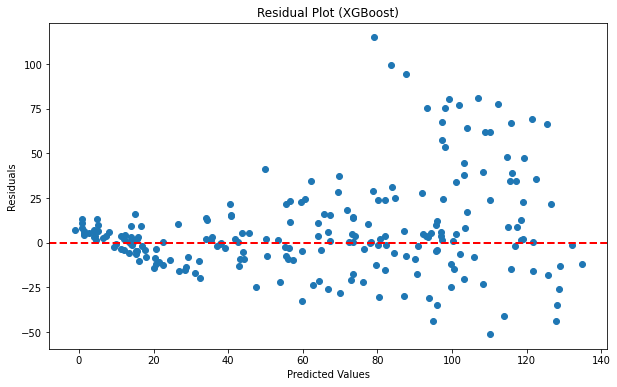

In [42]:
# Step 4: Calculate residuals (difference between actual and predicted values)
residuals = y_test - Y_pred

# Step 5: Plot residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()